# Project - IMDB Movie Reviews



*   Aashi Aashi 
*   Alisha Sood 
*   Harshit Jain
*   Akshaya Mudar  
*   Tyler Cushing

In [ ]:
import sys
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
import os
import copy
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import sklearn
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import re
import seaborn as sns; sns.set_theme()
from sklearn import manifold
%matplotlib inline
import math
from matplotlib import pyplot as plt

In [56]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

## Getting the links of webpages to scrape

In [57]:
page_url ='https://www.imdb.com/feature/genre/?ref_=nv_ch_gr'
driver = webdriver.Chrome(ChromeDriverManager().install()) ### Incase of Jupyter Notebook
Links=[]
driver.get(page_url)
driver.maximize_window()
driver.implicitly_wait(10)
link=driver.find_elements(By.XPATH, value='//*[@id="main"]//div/div/div/a')
for i in link:
    Link=i.get_attribute("href")
    Links.append(Link)
    if len(Links)>10:
        break

time.sleep(5)
driver.close()

/var/folders/wh/f1gf_vp175112kx_fb3lwg5c0000gn/T/ipykernel_64385/1589755710.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install()) ### Incase of Jupyter Notebook


In [58]:
pd.DataFrame(Links).to_csv("Links_firstbase.csv", index=False)

# Scraping the links of Movies

In [60]:
driver = webdriver.Chrome(ChromeDriverManager().install())
Movie_Links=[]
for url in Links:
    driver.get(url)
    driver.maximize_window()
    driver.implicitly_wait(10)
    link=driver.find_elements(By.XPATH, value='//*[@id="main"]//div[3]/h3/a')
    for i in link:
        Link=i.get_attribute("href")
        Movie_Links.append(Link)

time.sleep(5)
driver.close()

/var/folders/wh/f1gf_vp175112kx_fb3lwg5c0000gn/T/ipykernel_64385/1941120327.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [61]:
pd.DataFrame(Movie_Links).to_csv("Movie_Links.csv", index=False)

# Scraping comments Link for different Movies

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())
Links_extras=[]
Comments_link=[]
Movie=[]
Storyline=[]
Plot=[]
for url in Movie_Links:
    Links_extras=[]
    driver.get(url)
    driver.maximize_window()
    driver.implicitly_wait(10)
    movie=driver.find_element(By.CLASS_NAME, value='sc-80d4314-1.fbQftq').text
    #movie_name=movie[0].find_element(By.CLASS_NAME, value='sc-b73cd867-0.eKrKux').text
    Movie.append(movie)
    try:
        story=driver.find_elements(By.CLASS_NAME, value='sc-132205f7-0.bJEfgD')
        story_line=story[0].find_element(By.CLASS_NAME, value='ipc-html-content-inner-div').text
    except:
        story_line=' '
    Storyline.append(story_line)
    #plot_line=driver.find_element(By.CLASS_NAME, value='sc-16ede01-7.hrgVKw').text
    #Plot.append(plot_line)
    link=driver.find_elements(By.CLASS_NAME,value='ipc-title-link-wrapper')
    for i in link:
        Link=i.get_attribute("href")
        Links_extras.append(Link)
    Comment = [s for s in Links_extras if s.__contains__("reviews")]
    Comments_link.append(Comment)

time.sleep(5)
driver.close()

In [86]:
Movie_Details = pd.DataFrame(columns = ['Movie','StoryLine'])
Movie_Details['Movie']=Movie
Movie_Details['StoryLine']=Storyline

Movie_Details.to_csv("Movie_Details.csv", index=False)

In [172]:
Final_comments=[]

for i in range(len(Comments_link)):
    if len((Comments_link[i]))==0:
        continue
    else:
        Final_comments.append(Comments_link[i][0])

pd.DataFrame(Final_comments).to_csv("Comments_link.csv", index=False)

Final_comments_df=pd.read_csv('Comments_link.csv', names=['Link'])

Final_comments_df=Final_comments_df.iloc[1: ,:]

# Scraping the Reviews for different Movies

In [ ]:
Reviews=[]
MovieName=[]
Rating=[]

In [295]:
driver = webdriver.Chrome(ChromeDriverManager().install())

for url in Final_comments_df:
    previous_len=len(Reviews)
    temporay_movie_list=[]
    driver.get(url)
    driver.maximize_window()
    driver.implicitly_wait(10)
    movie=driver.find_element(By.XPATH, value='//*[@id="main"]/section/div[1]/div/div').text
    temporay_movie_list.append(movie)
    try:
        loadmore=driver.find_element(By.CLASS_NAME, value='ipl-load-more__button')
        loadmore.click()
    except:
        pass
    content=driver.find_elements(By.CLASS_NAME, value='lister-item-content')
    for con in content:
        try:
            reviews=con.find_element(By.CLASS_NAME, value='text.show-more__control').text
            Reviews.append(reviews)
        except:
            reviews='N/A'
            Reviews.append(reviews)
            
        try:
            Ratings= con.find_element(By.CLASS_NAME, value='rating-other-user-rating').text
            Rating.append(Ratings)
        except:
            Ratings='N/A'
            Rating.append(Ratings)
    current_len=len(Reviews)
    new=current_len-previous_len
    temporay_movie_list=temporay_movie_list*new
    MovieName.append(temporay_movie_list)

time.sleep(5)
driver.close()

/var/folders/wh/f1gf_vp175112kx_fb3lwg5c0000gn/T/ipykernel_64385/1927806725.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [335]:
Movie_Names=[]
for i in (MovieName):
    for j in i:
        Movie_Names.append(j)

MovieReviews = pd.DataFrame(columns = ['Movie','Review','Ratings'])

MovieReviews['Movie']= Movie_Names
MovieReviews['Review']= Reviews
MovieReviews['Ratings']= Rating

In [336]:
MovieReviews['Ratings'] =MovieReviews['Ratings'].apply( lambda x: '' if x=='N/A' else x )

MovieReviews['Ratings']=MovieReviews['Ratings'].apply(lambda x: x.split("/"))

MovieReviews['Ratings']=MovieReviews['Ratings'].apply(lambda x: x[0])
MovieReviews['Ratings'] = pd.to_numeric(MovieReviews['Ratings'])
MovieReviews["Movie"]=MovieReviews["Movie"].apply(lambda x: x.split("("))
MovieReviews["Movie"]=MovieReviews["Movie"].apply(lambda x: x[0])

In [337]:
pd.DataFrame(MovieReviews).to_csv("MovieReviews.csv", index=False)

# Reading the Scraped file for Movie Reviews

In [465]:
Movie_Reviews_df=pd.read_csv("MovieReviews.csv")
Movie_Reviews_df.head(5)

,Movie,Review,Ratings
0,Hocus Pocus 2,Not bad but super lackluster compared to the o...,NaN
1,Hocus Pocus 2,I was really excited to see this and shouldn't...,NaN
2,Hocus Pocus 2,NaN,5.0
3,Hocus Pocus 2,Where to begin\n\nWhat's good\n\nUmm not much\...,1.0
4,Hocus Pocus 2,NaN,1.0


In [466]:
Movie_Reviews_df.isna().sum()

Movie         0
Review     2042
Ratings     566
dtype: int64

In [467]:
Movie_Reviews_df.dropna(inplace=True)

In [468]:
def replacenewline(x):
    return(str(x).replace('\n', ' '))
Movie_Reviews_df['Review']=Movie_Reviews_df['Review'].apply(replacenewline)

In [469]:
Movie_Reviews_df['Movie'] = Movie_Reviews_df['Movie'].apply(str.lower)
Movie_Reviews_df['Review'] = Movie_Reviews_df['Review'].apply(str.lower)
Movie_Reviews_df

,Movie,Review,Ratings
3,hocus pocus 2,where to begin what's good umm not much thi...,1.0
5,hocus pocus 2,"sorry, but this was indeed a big disappointmen...",1.0
6,hocus pocus 2,took sheer will power to get through the first...,1.0
8,hocus pocus 2,i didn't expect greatness. i didn't expect ter...,2.0
9,hocus pocus 2,"why? why? why? i wanted to like this, i tried...",4.0
...,...,...,...
10794,bojack horseman,if you can get past the first three episodes w...,9.0
10795,bojack horseman,bojack horseman is easily one of the best anim...,8.0
10796,bojack horseman,"now that the show is over, i need to shout a b...",10.0
10798,bojack horseman,when i began watching in 2014 i was not expect...,9.0


# Generating a Movie recommender system based upon User Inputed attributes

In [470]:
required_attributes_list=['scary','horror','funny']
required_attributes=' '.join(required_attributes_list)
required_attributes

'scary horror funny'

In [471]:
def cosine(data):
    final_data=[data,required_attributes]
    count_vectorizer = CountVectorizer()
    vector_matrix = count_vectorizer.fit_transform(final_data)
    tokens = count_vectorizer.get_feature_names()
    cosine_similarity_matrix = cosine_similarity(vector_matrix)
    return cosine_similarity_matrix[0][1]

In [472]:
Movie_Reviews_df['Cosine_Similarity']=Movie_Reviews_df['Review'].apply(cosine)

/Users/aashi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [473]:
Movie_Reviews_df

,Movie,Review,Ratings,Cosine_Similarity
3,hocus pocus 2,where to begin what's good umm not much thi...,1.0,0.000000
5,hocus pocus 2,"sorry, but this was indeed a big disappointmen...",1.0,0.000000
6,hocus pocus 2,took sheer will power to get through the first...,1.0,0.000000
8,hocus pocus 2,i didn't expect greatness. i didn't expect ter...,2.0,0.000000
9,hocus pocus 2,"why? why? why? i wanted to like this, i tried...",4.0,0.000000
...,...,...,...,...
10794,bojack horseman,if you can get past the first three episodes w...,9.0,0.040825
10795,bojack horseman,bojack horseman is easily one of the best anim...,8.0,0.000000
10796,bojack horseman,"now that the show is over, i need to shout a b...",10.0,0.000000
10798,bojack horseman,when i began watching in 2014 i was not expect...,9.0,0.000000


In [474]:
Movie_Reviews=Movie_Reviews_df.groupby(['Movie']).agg({'Cosine_Similarity':'mean','Ratings':'mean'})
Movie_Reviews.reset_index(inplace=True)
Movie_Reviews[['Movie','Cosine_Similarity']].sort_values(by='Cosine_Similarity', ascending=False).head(5)

,Movie,Cosine_Similarity
209,trick 'r treat,0.065360
110,my best friend's exorcism,0.061109
18,barbarian,0.052833
148,sissy,0.052495
151,speak no evil,0.051136



# Finding Top 5 Movies of different Genres based upon Lift Values of Reviews

In [477]:
def removing_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw =' '.join([word for word in text_tokens if not word in stopwords.words('english')])
    text_tokens = list(set(word_tokenize(tokens_without_sw)))
    return text_tokens

Movie_Reviews_df['Review_tokenized']=Movie_Reviews_df['Review'].apply(removing_stopwords)

In [480]:
Movie_Reviews_df

,Movie,Review,Ratings,Cosine_Similarity,Review_tokenized
3,hocus pocus 2,where to begin what's good umm not much thi...,1.0,0.000000,"[., must, disnification, another, dissappointe..."
5,hocus pocus 2,"sorry, but this was indeed a big disappointmen...",1.0,0.000000,"[indeed, compensate, ., financially, n't, expe..."
6,hocus pocus 2,took sheer will power to get through the first...,1.0,0.000000,"[., waiting, n't, love, 10, comfort, terrible,..."
8,hocus pocus 2,i didn't expect greatness. i didn't expect ter...,2.0,0.000000,"[., tried, n't, give, brings, expect, want, vi..."
9,hocus pocus 2,"why? why? why? i wanted to like this, i tried...",4.0,0.000000,"[tried, wanted, ., n't, sake, 4, casting, dull..."
...,...,...,...,...,...
10794,bojack horseman,if you can get past the first three episodes w...,9.0,0.040825,"[., say, expect, episodes, mental, get, bad, t..."
10795,bojack horseman,bojack horseman is easily one of the best anim...,8.0,0.000000,"[., hearing, say, n't, alcoholic, said, right,..."
10796,bojack horseman,"now that the show is over, i need to shout a b...",10.0,0.000000,"[people, thank, ., need, ,, show, shout, big, ..."
10798,bojack horseman,when i began watching in 2014 i was not expect...,9.0,0.000000,"[., n't, character, life, imagine, complete, d..."


In [526]:
features=['horror' ,'sci-fi' , 'romantic', 'action', 'drama', 'fantasy', 'animation','mystery', 'comedy','thriller', 'superhero','war','cartoon','kids']

In [614]:
def list_words(x,y):
    word_list=[]
    for row in x[y]:
        word_list+=list(set(row))
    return word_list

Word_list=list_words(Movie_Reviews_df,'Review_tokenized')
word_freq = nltk.FreqDist(Word_list)

In [622]:

#Filtering counts for brands
feature_counts = []
for key,item in word_freq.most_common(5000):
    if key in features:
        temp = (key,item)
        feature_counts.append(temp)
print("The features from frequency counts \n")
feature_counts

The features from frequency counts 



[('action', 804),
 ('horror', 709),
 ('drama', 701),
 ('comedy', 649),
 ('mystery', 360),
 ('kids', 307),
 ('thriller', 285),
 ('animation', 251),
 ('sci-fi', 168),
 ('fantasy', 154),
 ('war', 151),
 ('superhero', 139),
 ('cartoon', 90),
 ('romantic', 78)]

In [623]:
key=list()
value=list()
log_value=list()
for entry in feature_counts:
    key.append(str(entry[0]))
    value.append(int(entry[1]))

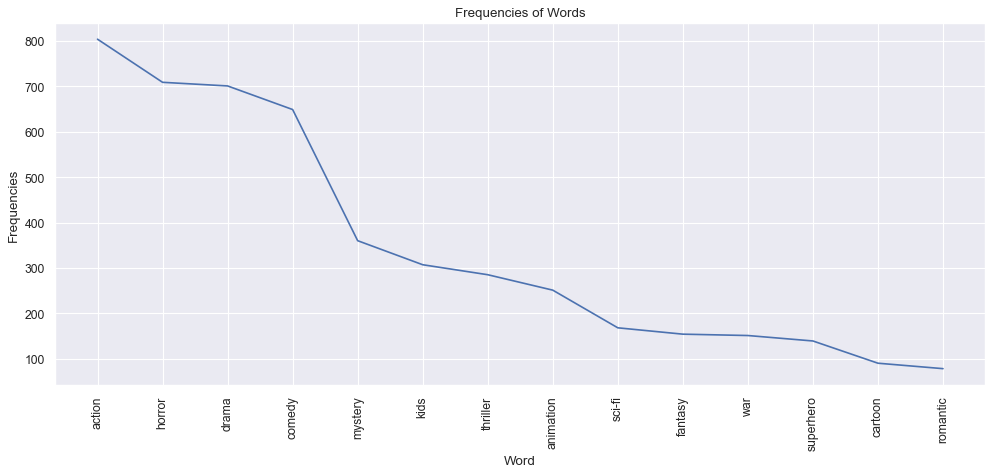

In [624]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(key, value)  
plt.title('Frequencies of Words')
plt.xlabel('Word')
plt.ylabel('Frequencies')
plt.xticks(rotation = 90)
plt.show()

In [527]:
movies_list=list(set(Movie_Reviews_df['Movie']))
movies_count = pd.DataFrame(columns = movies_list+features)
movies_count

,my best friend's exorcism,the midnight club,midsommar,my friend dahmer,a friend of the family,"lyle, lyle, crocodile",the nightmare before christmas,black mirror,the x-files,east new york,...,drama,fantasy,animation,mystery,comedy,thriller,superhero,war,cartoon,kids


In [528]:
def feature_counter(item):
    if feature in item:
        return 1
    else:
        return 0
    
def movie_counter(item):
    if mov in item:
        return 1
    else:
        return 0
      
for  mov in movies_list:
    movies_count[mov] = Movie_Reviews_df['Movie'].apply(movie_counter)  

for  feature in features:
    movies_count[feature] = Movie_Reviews_df['Review_tokenized'].apply(feature_counter)

In [529]:
movie_feature_lift = pd.DataFrame(columns = features, dtype=float)
length=len(movies_count)
for i in range(len(movies_list)):
    for j in range(len(features)):
        
        Confidence=(movies_count[((movies_count[movies_list[i]]==1) & (movies_count[features[j]]==1 ))][movies_list[i]].count())
        Support_i=(movies_count[((movies_count[movies_list[i]]==1))][movies_list[i]].count())
        Support_j=(movies_count[((movies_count[features[j]]==1))][features[j]].count())
        
        if Support_i==0 or Support_j==0:
            Lift=0
        else :
            Lift=(Confidence*length/(Support_i*Support_j))
        movie_feature_lift.loc[movies_list[i],features[j]]=float(Lift)


movie_feature_lift

,horror,sci-fi,romantic,action,drama,fantasy,animation,mystery,comedy,thriller,superhero,war,cartoon,kids
my best friend's exorcism,6.610367,0.0,0.0,0.000000,0.742867,0.000000,0.0,0.000000,4.814330,0.000000,0.0,0.000000,0.000000,1.696254
the midnight club,5.288293,0.0,0.0,0.000000,2.377175,0.000000,0.0,4.628889,0.000000,0.000000,0.0,0.000000,4.628889,4.071010
midsommar,7.834509,0.0,0.0,0.000000,1.584784,3.606926,0.0,3.085926,0.855881,0.000000,0.0,0.000000,0.000000,1.809338
my friend dahmer,1.958627,0.0,0.0,0.000000,1.980980,0.000000,0.0,0.000000,1.426468,1.624172,0.0,0.000000,0.000000,3.015563
a friend of the family,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.641911,0.000000,0.0,0.000000,0.000000,1.357003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
law & order: special victims unit,0.000000,0.0,0.0,0.000000,0.625572,0.000000,0.0,1.218129,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
thor: love and thunder,0.000000,0.0,0.0,0.545431,0.000000,0.000000,0.0,0.000000,1.351391,0.000000,0.0,2.904148,0.000000,2.142637
peaky blinders,0.000000,0.0,0.0,1.413161,4.862404,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.032511,0.000000,0.000000
the bear,0.000000,0.0,0.0,0.431799,1.485735,2.254329,0.0,0.000000,3.744479,0.000000,0.0,0.000000,0.000000,0.000000


In [514]:
movie_feature_lift['horror'].sort_values(ascending=False).head(5)

speak no evil            10.072940
trick 'r treat            9.896222
barbarian                 8.394116
mr. harrigan's phone      8.226234
the invitation            8.135836
Name: horror, dtype: float64

In [515]:
movie_feature_lift['sci-fi'].sort_values(ascending=False).head(5)

significant other     19.838095
the orville           19.406832
vesper                17.504202
westworld             14.586835
the x-files           13.225397
Name: sci-fi, dtype: float64

In [516]:
movie_feature_lift['romantic'].sort_values(ascending=False).head(5)

ticket to paradise          30.520147
entergalactic               21.364103
where the crawdads sing     20.346764
the empress                 13.933110
sita ramam                  12.818462
Name: romantic, dtype: float64

In [517]:
movie_feature_lift['action'].sort_values(ascending=False).head(5)

the gray man       7.772388
memory             6.545169
bullet train       5.722952
daredevil          4.956305
the woman king     4.749793
Name: action, dtype: float64

In [518]:
movie_feature_lift['drama'].sort_values(ascending=False).head(5)

sherwood                6.881297
peaky blinders          4.862404
don't worry darling     3.961959
the wire                3.961959
9-1-1                   3.803481
Name: drama, dtype: float64

In [519]:
movie_feature_lift['fantasy'].sort_values(ascending=False).head(5)

the witcher                                           18.936364
the lord of the rings: the fellowship of the ring     17.085441
the lord of the rings: the rings of power             12.881880
american psycho                                       10.820779
pinocchio                                             10.144481
Name: fantasy, dtype: float64

In [520]:
movie_feature_lift['animation'].sort_values(ascending=False).head(5)

entergalactic               21.576892
arcane                      16.597610
dc league of super-pets     15.088736
attack on titan             13.579862
sing 2                      12.909252
Name: animation, dtype: float64

In [540]:
movie_feature_lift['mystery'].sort_values(ascending=False).head(5)

see how they run     12.075362
see                   7.308772
the invitation        7.121368
inheritance           5.786111
the watcher           5.786111
Name: mystery, dtype: float64

In [522]:
movie_feature_lift['comedy'].sort_values(ascending=False).head(5)

it's always sunny in philadelphia     7.336122
derry girls                           5.835551
the lost city                         5.502091
ticket to paradise                    5.502091
she-hulk: attorney at law             5.405563
Name: comedy, dtype: float64

In [523]:
movie_feature_lift['thriller'].sort_values(ascending=False).head(5)

don't worry darling     9.745029
significant other       9.745029
watcher                 8.932943
vikram vedha            8.352882
last seen alive         7.693444
Name: thriller, dtype: float64

In [524]:
movie_feature_lift['superhero'].sort_values(ascending=False).head(5)

the boys                      25.238925
dc league of super-pets       19.072596
she-hulk: attorney at law     18.929193
daredevil                     10.424773
the umbrella academy           7.818580
Name: superhero, dtype: float64

In [531]:
movie_feature_lift['war'].sort_values(ascending=False).head(5)

the greatest beer run ever     48.281457
the woman king                 13.794702
athena                         11.035762
peaky blinders                 10.032511
amsterdam                       9.196468
Name: war, dtype: float64

In [532]:
movie_feature_lift['cartoon'].sort_values(ascending=False).head(5)

rick and morty      19.287037
the simpsons        17.358333
bojack horseman     16.832323
bob's burgers       14.812444
family guy          12.769349
Name: cartoon, dtype: float64

In [533]:
movie_feature_lift['kids'].sort_values(ascending=False).head(5)

minions: the rise of gru     14.160034
lyle, lyle, crocodile        12.213029
dc league of super-pets       9.869115
hocus pocus                   9.046688
pinocchio                     6.785016
Name: kids, dtype: float64

# Finding the LIFT Values between different Genres and Plotting MDS to see how are different genres related to each other

In [537]:
movies_feature = pd.DataFrame(columns =features)
movies_feature

,horror,sci-fi,romantic,action,drama,fantasy,animation,mystery,comedy,thriller,superhero,war,cartoon,kids


In [538]:
def feature_counter(item):
    if feature in item:
        return 1
    else:
        return 0

for  feature in features:
    movies_feature[feature] = Movie_Reviews_df['Review_tokenized'].apply(feature_counter)

In [608]:
feature_lift = pd.DataFrame(columns = features, dtype=float)
length=len(features)
for i in range(len(features)):
    for j in range(len(features)):
        if j==i :
            feature_lift.loc[features[i],features[j]]=np.NaN
        else:
        
            Confidence=(movies_count[((movies_count[features[i]]==1) & (movies_count[features[j]]==1 ))][features[i]].count())
            Support_i=(movies_count[((movies_count[features[i]]==1))][features[i]].count())
            Support_j=(movies_count[((movies_count[features[j]]==1))][features[j]].count())
        
            if Support_i==0 or Support_j==0:
                Lift=0
            else :
                Lift=(Confidence*length/(Support_i*Support_j))

                feature_lift.loc[features[i],features[j]]=float(Lift)


<AxesSubplot:>

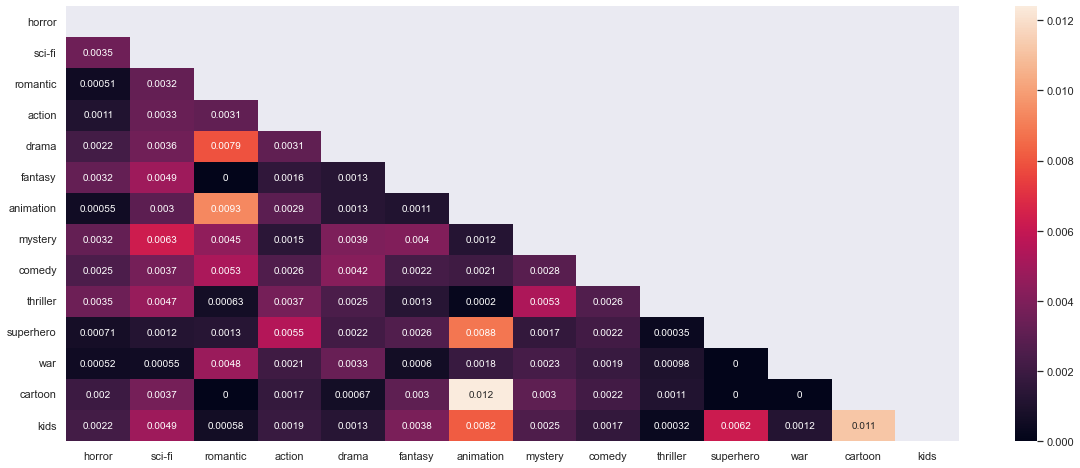

In [609]:
feature_lift_mds=feature_lift.copy(deep=True)

for i in range(len(features)):
    for j in range(len(features)):
        if j>=i :
            feature_lift.loc[features[i],features[j]]=np.NaN
plt.figure(figsize=(20,8))
sns.heatmap(feature_lift.fillna(0),annot=True,mask=np.triu(feature_lift))

/Users/aashi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


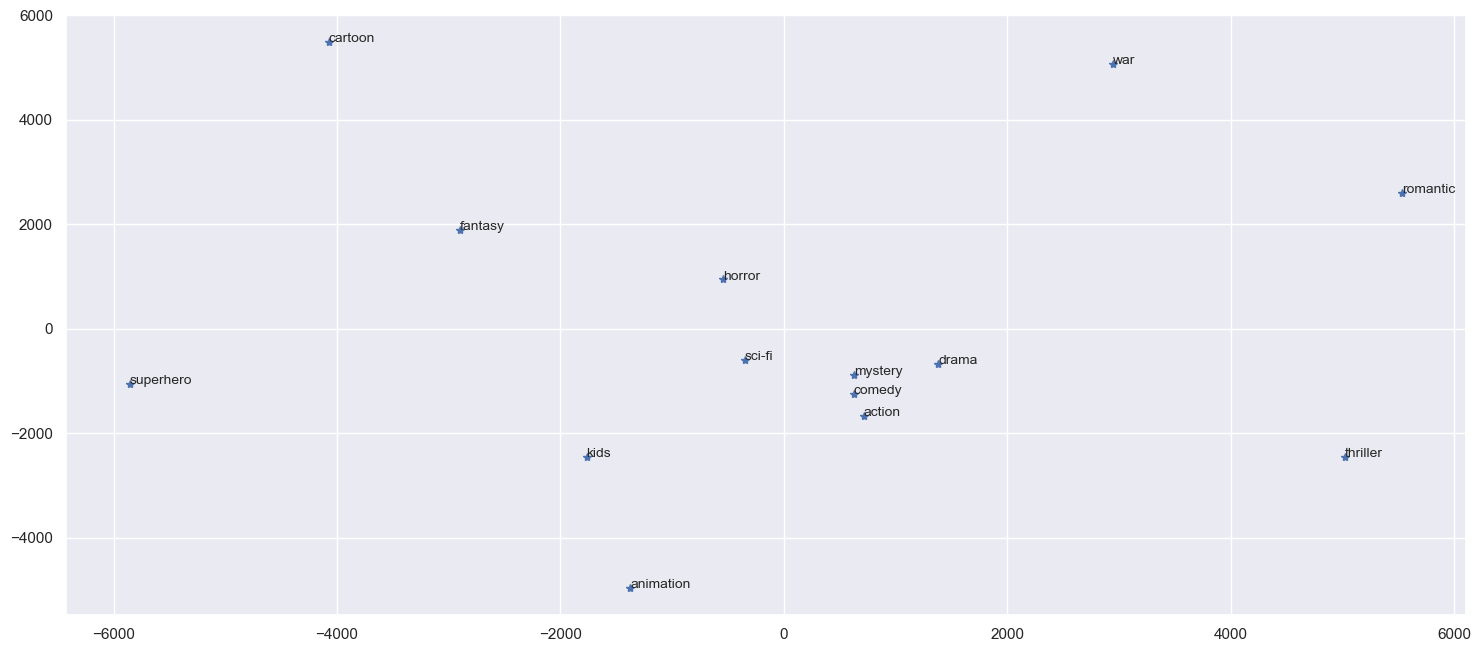

In [610]:
from sklearn.manifold import MDS
scale = StandardScaler()
scale = sklearn.preprocessing.scale
feature_lift_mds = pd.DataFrame(feature_lift_mds)
df_disimilarity=1/feature_lift_mds
df_disimilarity.fillna(0,inplace=True)
df_disimilarity.replace([np.inf, -np.inf], 5000, inplace=True)
df_disimilarity


mds=MDS(n_components=2)

npos=mds.fit_transform((df_disimilarity))

# df_disimilarity.index
fig = plt.figure(1, figsize=(14, 6), frameon=False, dpi=100)
fig.add_axes([0, 0, 1, 1])
ax = plt.plot(npos[:,0],npos[:,1],'*')

#corners = ((0, 0), (10000, 10000))
#ax.update_datalim(corners)

for i in range(len(npos)):
    plt.text(npos[i,0],npos[i,1],df_disimilarity.index[i])